In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [2]:
df_stats = pd.read_excel('MU_stats.xlsx', 'Sheet2')

In [3]:
df_stats.columns

Index(['Minute', 'Player', 'Squad', 'xG', 'Outcome'], dtype='object')

In [4]:
df_stats

,Minute,Player,Squad,xG,Outcome
0,4,Patrick Bamford,Leeds United,0.15,Saved
1,4,Crysencio Summerville,Leeds United,0.21,Off Target
2,20,Bruno Fernandes,Manchester Utd,0.06,Off Target
3,21,Patrick Bamford,Leeds United,0.08,Blocked
4,39,Bruno Fernandes,Manchester Utd,0.09,Saved
5,44,Crysencio Summerville,Leeds United,0.05,Saved
6,46,Bruno Fernandes,Manchester Utd,0.30,Saved
7,47,Crysencio Summerville,Leeds United,0.03,Saved
8,48,Weston McKennie,Leeds United,0.17,Off Target
9,48,Jack Harrison,Leeds United,0.28,Off Target


In [5]:
df_h = df_stats[df_stats.Squad!='Manchester Utd']
df_a = df_stats[df_stats.Squad=='Manchester Utd']

In [6]:
xg_a = df_a['xG'].astype(float).tolist()
xg_h = df_h['xG'].astype(float).tolist()

In [7]:
xg_a_min = df_a['Minute'].astype(float).tolist()
xg_h_min = df_h['Minute'].astype(float).tolist()

In [8]:
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

In [9]:
a_cumulative = nums_cumulative_sum(xg_a)
h_cumulative = nums_cumulative_sum(xg_h)

In [10]:
a_total = round(a_cumulative[-1], 2)
h_total = round(h_cumulative[-1], 2)

In [11]:
print(a_total)
print(h_total)

1.12
1.86


In [24]:
df_a['cumulative xG'] = a_cumulative
df_h['cumulative xG'] = h_cumulative

<ipython-input-24-0a24ec702770>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['cumulative xG'] = a_cumulative
<ipython-input-24-0a24ec702770>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h['cumulative xG'] = h_cumulative


In [25]:
df_goals = pd.concat([df_a, df_h])

In [27]:
df_goals = df_goals[df_goals['Outcome'] == 'Goal']

In [28]:
df_goals['Minute'] = df_goals['Minute'].astype(int)

<ipython-input-28-c5b7ea9cdb67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goals['Minute'] = df_goals['Minute'].astype(int)


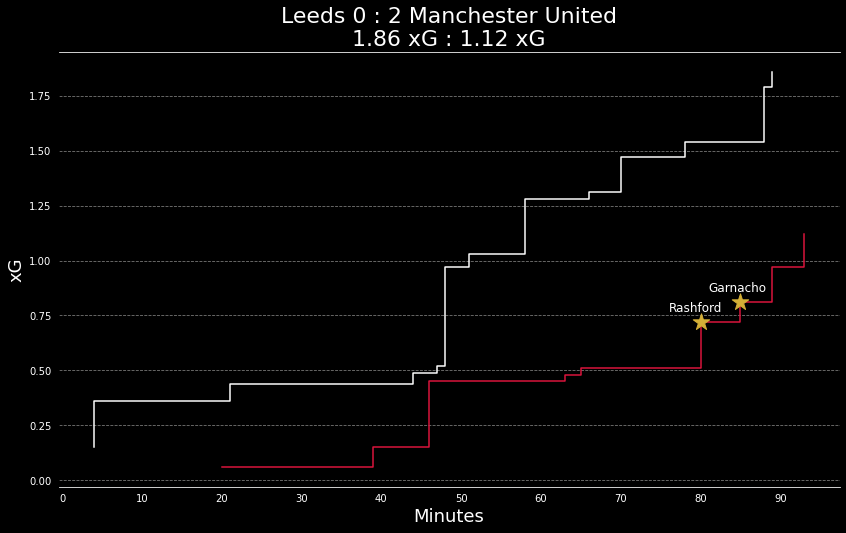

In [33]:
fig, ax = plt.subplots(figsize=(14,8), facecolor='black')
ax.set(facecolor = "black")
plt.title('Leeds 0 : 2 Manchester United\n1.86 xG : 1.12 xG', color='white', fontsize=22)
plt.xticks([0,10,20,30,40,50,60,70,80,90], color='white')
plt.yticks(color='white')
plt.xlabel('Minutes', color='white', fontsize=18)
plt.ylabel('xG', color='white', fontsize=18)
ax.spines['top'].set_color('white')
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_visible(False)
ax.scatter(x=df_goals['Minute'], y=df_goals['cumulative xG'],s=300,c='#D4AF37',zorder=20, marker='*')
annotations = df_goals.Player.tolist()
for i, label in enumerate(annotations):
    temp = label.split()
    ax.annotate(temp[1], (df_goals['Minute'].iloc[i]-4, df_goals['cumulative xG'].iloc[i]+0.05), fontsize=12, color='white', zorder=20)
ax.step(x=xg_a_min, y=a_cumulative, where='post', c='#DC143C',zorder=5)
ax.step(x=xg_h_min, y=h_cumulative, where='post', c='white',zorder=5)
ax.grid(axis='y', linestyle='--', which='major', color='#FAF9F6', alpha=0.5)
fig.savefig('LEEMUN.png', bbox_inches='tight', dpi=200, facecolor='black')


In [40]:
df_table = pd.read_excel('MU_stats.xlsx', 'Sheet1')

In [41]:
ranges = range(1, len(df_table.index)+1)

In [42]:
df_table

,Metric,Manchester United,Leeds
0,xG,1.10,1.8000
1,Possession,0.66,0.3400
2,Territory,0.48,0.5200
3,xG/shot,0.10,0.1125


<ipython-input-74-eba31b082967>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


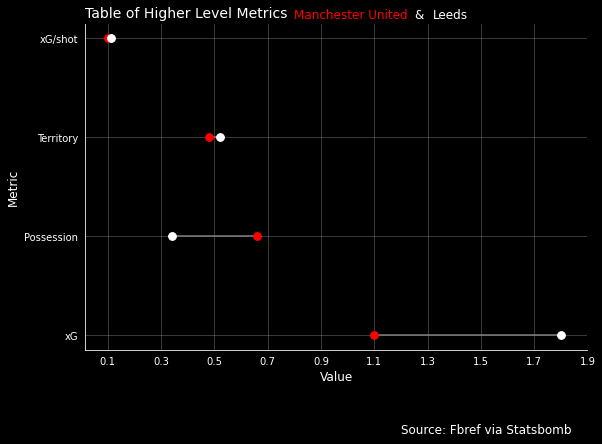

In [74]:
plt.figure(facecolor='black', figsize=(9,6))
plt.hlines(y=ranges, xmin=df_table['Manchester United'], xmax=df_table['Leeds'], color='grey')
plt.scatter(df_table['Manchester United'], ranges, color='red', label='MU', s=60, zorder=5)
plt.scatter(df_table['Leeds'], ranges, color='white', label='LEEDS', s=60, zorder=5)
plt.yticks(ranges, df_table['Metric'], color='white')
plt.xticks([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9], color='white')
plt.xlabel('Value', color='white', fontsize=12)
plt.ylabel('Metric', color='white', fontsize=12)
plt.grid(alpha=0.4)
plt.title("Table of Higher Level Metrics", color='white', loc='left', fontsize=14)
plt.text(0.8, 4.2, 'Manchester United', color='red', ha='left', fontsize=12)
plt.text(1.25, 4.2, '&', color='white', fontsize=12)
plt.text(1.32, 4.2, 'Leeds', color='white', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('white')
plt.gca().spines['bottom'].set_color('white')
ax = plt.axes()
ax.set_facecolor('black')
plt.text(1.2, 0, 'Source: Fbref via Statsbomb', color='white', fontsize=12)
plt.savefig(fname='Table.png', bbox_inches='tight', dpi=200, facecolor='black')